# Diamond Price Predictions

Seok Young Park

Michael Flynn

Mahir Thakkar


## 1. Introduction

**Problem and Motivation** : It is difficult for people who are looking for diamond rings or necklaces but have no knowledge of diamond quality factors such as clarity, color, carats or cut. To find a diamond that suit their needs and also fit their budget can be time-consuming. By building this model and performing statistical analysis, we would like to create an easy and efficient way for people to predict the approximate prices of diamonds on the market. This would certainly help them set expectations and could also save them from overpaying for diamonds. It can also help those who would like to resell diamonds with no prior experience by helping them decide appropriate prices for their diamonds.

**The Diamond Dataset**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price. The data set was taken from kaggle and it's link is **https://www.kaggle.com/datasets/shivam2503/diamonds**

*Description of all the varaibles:*

1) **Price**: Price in US dollars of the diamond, This is the target column containing tags for the features. 

2) **Carat** : (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

3) **Cut** : (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

4) **Color** : From J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

5) **Clarity** : (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

6) **X** : (changed to **length**) : length in mm 

7) **Y** : (changed to **width**) : width in mm 

8) **Z** : (changed to **length**) : depth in mm

9) **depth** : (changed to **total_depth_percentage**) : z / mean(x, y) = 2 * z / (x + y)

10) **table** : width of top of diamond relative to widest point

**This Report will explore** : 

1) Is there an association between diamond price and length? How does this relationship between price and length change for different clarities?

2) Is there an association between (D) coloured diamonds and price in our population of diamonds? Specifically, we would like to know if the average price of D coloured diamonds is greather than the average price of NON - D coloured diamonds

3) Is there a linear relationship between price and total depth percentage,table, carat, and cut? What about the population of diamonds?

4) Is there a linear relationship between the log-odds of the success level of price and color, clarity, table, and the total depth percentage of diamonds?

5)What explanatory variables should we include in the model to create a Parsimonious Model?

In [ ]:
#Imports here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import t, norm, f 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Data Preprocessing

**Since, there are about 54,000 diamonds in the data set, we decided to randomly sample 10% of our data (5400 diamonds), to easily visualiase and perform analysis on the same. We also chose a random state of 234, to maintain consistency amongst the analysis. Moreover, we changed the name of certain columns (x - length, y - width, z-depth, depth - total_depth_percentage) to provide a better conceptual clarity of the variable.**

In [ ]:
df = pd.read_csv('diamonds.csv')
df.rename(columns = {'x':'length', 'y':'width', 'z':'depth', 'depth':'total_depth_percentage'}, inplace = True)
df = df.sample(5400, random_state = 234)
df

,carat,cut,color,clarity,total_depth_percentage,table,price,length,width,depth
9832,1.01,Premium,D,SI2,60.3,57.0,4672,6.56,6.51,3.94
7384,0.33,Very Good,E,SI1,63.0,54.0,579,4.38,4.42,2.77
27825,0.34,Premium,D,SI2,60.8,60.0,650,4.53,4.49,2.74
42669,0.44,Ideal,E,VVS2,60.9,57.0,1334,4.95,4.90,3.00
18151,1.52,Ideal,J,SI1,61.9,57.0,7356,7.33,7.37,4.55
...,...,...,...,...,...,...,...,...,...,...
20572,1.60,Ideal,J,VS2,61.9,55.0,8886,7.51,7.54,4.66
15090,1.21,Premium,E,SI2,58.8,58.0,6065,7.07,6.91,4.11
46449,0.96,Fair,H,I1,68.9,59.0,1773,6.09,5.96,4.15
2631,0.72,Very Good,F,VS1,62.2,57.0,3229,5.70,5.74,3.56


-----IGNORE-------

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

---IGNORE----

**We would like to check if all the variables are in the right data type so we can perform analaysis on them** 

In [ ]:
df.dtypes

carat                     float64
cut                        object
color                      object
clarity                    object
total_depth_percentage    float64
table                     float64
price                       int64
length                    float64
width                     float64
depth                     float64
dtype: object

**Data types look good, now we can check for missing values in our data-set.**

In [ ]:
df.isna().sum()

carat                     0
cut                       0
color                     0
clarity                   0
total_depth_percentage    0
table                     0
price                     0
length                    0
width                     0
depth                     0
dtype: int64

**We cannot find any missing values. Hence, our dataframe is safe to use now!**

In [ ]:
df.shape

(5400, 10)

**There are 5400 rows and 10 columns in our sampled data frame**

## 2. Descriptive Analytics

**In this part, we are particulary looking at relationships between price, length and clarity.**


**Clarity and length of a diamond are two of the most important characteristics since they heavily influence how a diamond would look. We want to particulary understand if length has a major influence on the price of a diamond? and How could different clairities and lengtths affect the price of the diamond? We will be forming visualisations to analyse any association between the variables and then dive into summary statistics to evaluate the shape and spread of values in our data.**

####2.1. Is there an association between Diamond Price and Length?



**1A) VISUALISATION**

**We will use a scatterplot to visualise the relationship between diamond price and length!**

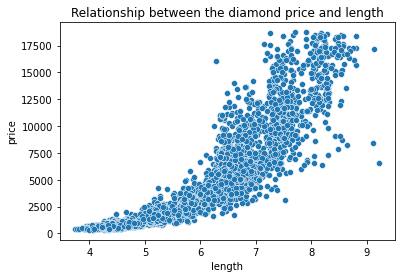

In [ ]:
sns.scatterplot(x = 'length', y = 'price', data = df)
plt.title('Relationship between the diamond price and length')
plt.show()

**In this graph, we can see that the two variables have a moderate to strong relationship, which means that length plays a significant role in deciding the price of a diamond, we will confirm this analyses using correlation in the next section**

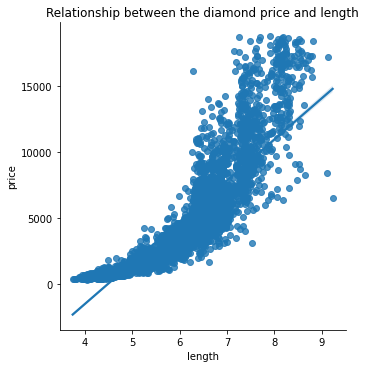

In [ ]:
sns.lmplot(x = 'length', y = 'price', data = df)
plt.title('Relationship between the diamond price and length')
plt.show()

**We can see that the association is non-linear and moderately strong**

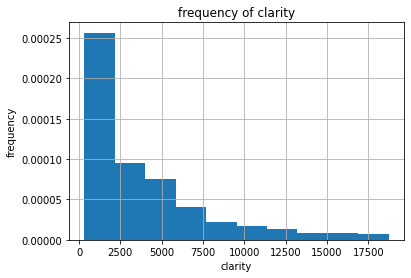

In [ ]:
df['price'].hist(density = True)
plt.xlabel('clarity')
plt.ylabel('frequency')
plt.title('frequency of clarity')
plt.show()

**Since the histogram of shows that the population of data is right skewed, it is better to use median as a measure of center and use IQR as a measure of spread.**

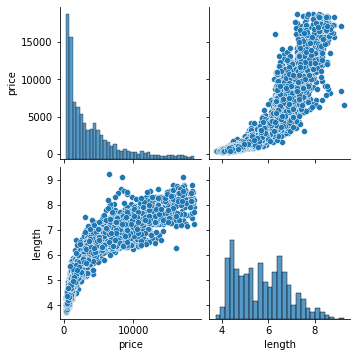

In [ ]:
df2 = df[['price','length']]

sns.pairplot(df2, kind="scatter")
plt.show()

**The pairplot of length and price shows that the data is skewed to the right**

**1B) Summary Statistics**

**We would like to confirm any associations between variables in the data set using Correlation Matrix**

In [ ]:
df.corr()

,carat,total_depth_percentage,table,price,length,width,depth
carat,1.000000,0.008868,0.164421,0.917818,0.978886,0.927674,0.971404
total_depth_percentage,0.008868,1.000000,-0.306745,-0.031857,-0.047222,-0.047318,0.076858
table,0.164421,-0.306745,1.000000,0.109524,0.183181,0.163418,0.139832
price,0.917818,-0.031857,0.109524,1.000000,0.883545,0.839563,0.871243
length,0.978886,-0.047222,0.183181,0.883545,1.000000,0.948067,0.985187
width,0.927674,-0.047318,0.163418,0.839563,0.948067,1.000000,0.946918
depth,0.971404,0.076858,0.139832,0.871243,0.985187,0.946918,1.000000


**We can see a correlation coeffiecient of 0.8835 between price and length which supports our analyses of relationship seen in the scatter plot above. Now, we would like to look at the median and IQR of our data which would help us understand the population of length and prices of diamonds in our data-set**

In [ ]:
df['price'].describe()

count     5400.000000
mean      3855.649074
std       3887.099100
min        327.000000
25%        959.500000
50%       2397.500000
75%       5227.250000
max      18735.000000
Name: price, dtype: float64

In [ ]:
##MEDIAN FOR PRICE
df['price'].median()

2397.5

In [ ]:
##IQR FOR PRICE
df['price'].quantile(q = 0.75) - df['price'].quantile(q = 0.25)

4267.75

In [ ]:
df['length'].describe()

count    5400.000000
mean        5.724569
std         1.103825
min         3.740000
25%         4.730000
50%         5.690000
75%         6.532500
max         9.230000
Name: length, dtype: float64

In [ ]:
##MEDIAN FOR LENGTH
df['length'].median()

5.69

In [ ]:
##IQR FOR LENGTH
df['length'].quantile(q = 0.75) - df['length'].quantile(q = 0.25)

1.8025000000000002

**The median of prices of diamonds in the data set is about 2397.5 with a IQR of 4267.5**

**The median of prices of diamonds in the data set is about 5.69 with a IQR of 1.8025**

****1C) CONCLUSION AND ANALYSIS****



**Yes, There is a moderately strong, non-linear association between price and length because of the following reasons:**

**1) The correlation coefiecient for length and price is 0.886725, which indicates that there is a moderately strong correlation between the two variables.**

**2) From the scatter plot, we can see that as the length increases, the price increases as well**

**3) Since the relation is not linear, we need to proceed with caution**


----x----x----x----

####2.2.How does this relationship between price and length change for different clarities?

**2A) VISUALISATION**

**We will use a scatterplot to understand the relationship between length. price and clarities of diamonds**

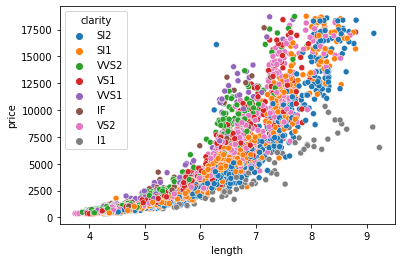

In [ ]:
sns.scatterplot(x='length', y='price', hue='clarity', data=df)
plt.show()

**CLARITY OF DIAMONDS IN ORDER FROM WORST TO BEST**

I1 - **WORST**

SI2

SI1

VS2

VS1

VVS2

VVS1

IF - **BEST**

**For the sake of simplicity, we will narrow down the conclusion to 3 clarities, the best (IF), the worst (I1), and one in the ceneter (VS1), to better understand how clarities affect the relationship between price and length**

In [ ]:
dftri = df[(df["clarity"] == "I1") | (df["clarity"] == "IF") | (df["clarity"] == "VS1")]


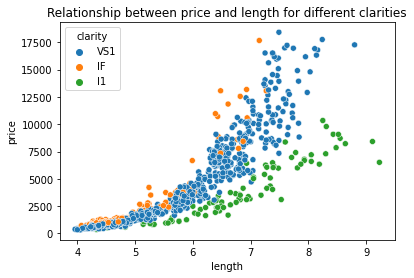

In [ ]:
sns.scatterplot(x='length', y='price', hue='clarity', data=dftri)
plt.title('Relationship between price and length for different clarities')
plt.show()

**Even though we do not see a linear relationship, we see a moderate, non-linear association between the two variables, for all three clarities! blue (VS1) is weaker as compared to other clarities. Since the relationship is non linear, we should proceed with caution!**

In [ ]:
dftri[['length', 'price']].groupby(dftri['clarity']).corr()

length     price
clarity                           
I1      length  1.000000  0.916176
        price   0.916176  1.000000
IF      length  1.000000  0.918373
        price   0.918373  1.000000
VS1     length  1.000000  0.918179
        price   0.918179  1.000000

**The colour orange (IF) denotes the best clarity of diamond, VS1 which is blue stands in the middle while the colour green (I1) denotes the worst clarity of diamond**

**From the correlation table, we can recognize there is a high correlation between length and price for each of the three clarity types we are analyzing, though we must consider that the relationship is not linear and a high-correlation doesnt imply there is a strong association**

**Comparing numerical variable (price) and categorical variable (clarity), boxplot will be useful. In addition, it shows whether they have outliers or not.**

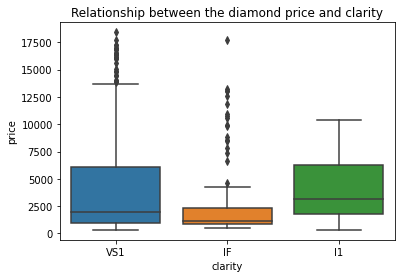

In [ ]:
sns.boxplot(x = 'clarity', y = 'price', data = dftri)
plt.title('Relationship between the diamond price and clarity')
plt.show()

**We can clearly see outliers in our desired data for clarities IF AND VS1**

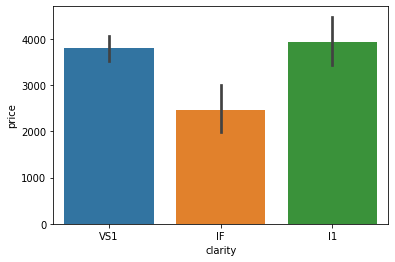

In [ ]:
ax = sns.barplot(x="clarity", y = 'price', data=dftri)

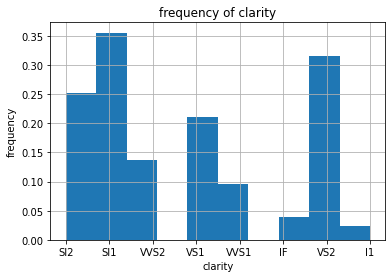

In [ ]:
df['clarity'].hist(density = True)
plt.xlabel('clarity')
plt.ylabel('frequency')
plt.title('frequency of clarity')
plt.show()

**2B) SUMMARY STATS**

**Since the histogram and barplot and boxplot of clarity variable shows it is skewed and some outliers exist, it is better to use median more than mean as a measure of center and use IQR more than standard deviation as a measure of spread.**

In [ ]:
df[['price', 'clarity']].groupby('clarity').median()

,price
clarity,
I1,3175.0
IF,1116.0
SI1,2840.0
SI2,3995.0
VS1,1941.0
VS2,1926.0
VVS1,1179.0
VVS2,1221.0


In [ ]:
df[['price', 'clarity']].groupby('clarity').quantile(q = 0.75) - df[['price', 'clarity']].groupby('clarity').quantile(q = 0.25)

,price
clarity,
I1,4404.5
IF,1454.5
SI1,4028.5
SI2,3427.0
VS1,5155.0
VS2,4911.0
VVS1,1709.0
VVS2,2538.5


**2C) CONCLUSION AND ANALYSIS**

**Yes, There is a moderately strong non linear association between price and length for different clarities because of the following reasons:**

**1) The correlation coefiecient for length and price for three types of clarities are 0.916176 (I1), 0.918373 (IF), and 0.918179 (VS1), respectively, which indicates that there is a moderately strong correlation between length and price for different clarities, however the relationship is non linear**

**2) From the scatter plot, we can see that for diamonds of same price, the  longer diamonds tend to have lower clarity, while the shorter diamonds have higher clarity in our population of diamonds.**

**---XX-----XX-----XX-------XX-----XX------XX-----**

## 3. INFERENCE

**Some individuals feel that the color of a diamond is unimportant, while others believe that yellow diamonds are more attractive and hence more valuable. People are frequently perplexed as to whether the color of a diamond affects its price. As a result, we'd want to know if D coloured diamonds (colorless/ the clearest diamonds) are more expensive than other colors or not.**


**Research Question** : Is there an association between (D) coloured diamonds and price in our population of diamonds? Specifically, we would like to know if the average price of D coloured diamonds is greather than the average price of NON - D coloured diamonds.

$H_0$ : The average price of D coloured diamonds = The average price of non-D coloured diamonds 

$H_A$ : The average price of D coloured diamonds > The average price of non-D coloured diamonds

**Or, in other words our hypothesis would be :**

$H_0: μ_{Dcolor} = μ_{nonDcolor}$

$H_A : μ_{Dcolor} > μ_{nonDcolor}$


**We will consider a 95% confidence interval and 0.05 as significance level for our analysis as per industry standards**

**Creating two data frames, one with diamonds which have D color and second with diamonds which have non-D color. This will allow us to find the average prices independently**

In [ ]:
df1 = df[df["color"] == "D"]
len(df1)

692

In [ ]:
df2 = df[df["color"] != "D"]
len(df2)

4708

The data frame with D color has 692 rows and data frame with non-D color has 4708 rows.

**Therefore, we will have that  𝑛1  = 692,  𝑛2  = 4708. where  𝑛1  is the sample size for D color diamonds, 𝑛2  is the sample size for non-D color diamonds.**



**Checking the CLT conditions:**

1) This is random sampling, both samples are random.

2) We have  𝑛1  = 692,  𝑛2  = 4708, they are both less than 10% of the population of diamonds (54000 in total)

3) In addition, 𝑛1 and 𝑛2 are both larger than 30.

4) Both the samples are independent.

**Calculating mean and standard deviation of price from the two data frames.**

In [ ]:
xbar1 = df1["price"].mean()
xbar2 = df2["price"].mean()

In [ ]:
std1 = df1["price"].std()
std2 = df2["price"].std()

**Creating a 95% confidence interval for $\mu_{Dcolor} − \mu_{nonDcolor}$.**

**We are assuming we do not know the population standard deviations i.e.
 "$\sigma_{Dcolor}" and "\sigma_{nonDcolor}$"**

**Since we don't know "$\sigma_{Dcolor}"  and "\sigma_{nonDcolor}$", we will use t-distribution.** 

**df = min(692 - 1, 4708 - 1) = 691**

In [ ]:
critical_value = t.ppf(0.975, df=691)
critical_value

1.9634030022619118

In [ ]:
point_estimate = xbar1 - xbar2
point_estimate

-1135.6087596564207

In [ ]:
std_error = np.sqrt((std1 ** 2)/ len(df1) + (std2 ** 2)/ len(df2))
std_error

129.88492602496012

**We found that the critical value is 1.96 and point estimate is -1135.6087, and the standard error is 129.8849. Next, we will find 95% confident interval and we will calculate the p-value.**

In [ ]:
lower_bound = point_estimate - critical_value * std_error
upper_bound = point_estimate + critical_value * std_error
print("The 95% confident interval is ", lower_bound, upper_bound)

The 95% confident interval is  -1390.6252133623937 -880.5923059504477


**The confident interval is (-1390.6252, -880.5923), which means that, we are 95% confident that the difference in prices of D and Non-D coloured diamonds is between -1390.6252 and -880.5923. In addition, the null value (0) is not in the confident interval and hence we can reject the null hypothesis. Therefore we have sufficient evidence to suggest the alternative hypothsis, that the average price of the average price of D coloured diamonds is greater than the average price of non-D coloured diamonds.**

In [ ]:
test_statistic = point_estimate / std_error
test_statistic

-8.743191334136723

In [ ]:
p_value = 1 - t.cdf(np.abs(test_statistic), df = 691)
p_value

0.0

**The p-value is 0, which is less than 0.05. Thus, we can reject the null hypothsis and conclude that we have enough evidence to suggest the alternative hypothsis, that the average price of D coloured diamonds is greater than the average price of non-D coloured diamonds.**

**Therefore, we found the average price of D coloured (clearest) diamonds is greater than the average price of Non-D coloured diamonds.**

## 4. Linear Regression

**Is there a linear relationship between price and total depth percentage,table, carat, and cut? What about in the population of diamonds?**

**Sometimes people are not able to judge the right price when they are buying diamonds. Moreover, people can know what colour, clarity and table of diamond would best suite their budget. This model would hence help users by predict the right price for diamonds using several characteristics and would help people from overpaying.**

**We will focus on the price of diamonds (response variable) by using explanatory variables like the total depth percentage, table, carat, and cut of the diamonds. We will explore their relation in this sample, also for the population.**


**MODEL**

In [ ]:
model = smf.ols('price ~ total_depth_percentage + table + carat + cut', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     4375.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:04:38   Log-Likelihood:                -47168.
No. Observations:                5400   AIC:                         9.435e+04
Df Residuals:                    5392   BIC:                         9.440e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4728.5855   1544.540      3.061      0.002    1700.663    7756.508
cut[T.Good]              887.4062    135.263      6.561      0.000     622.235    1152.577
cut[T.Ideal]            1348.6556    133.541     10.099      0.000    1086.861    1610.450
cut[T.Premium]          1089.0540    128.762      8.458      0.000     836.628    1341.480
cut[T.Very Good]        1134.6090    127.919      8.870      0.000     883.837    1385.381
total_depth_percentage   -88.2823     16.961     -5.205      0.000    -121.533     -55.032
table                    -48.2727     12.476     -3.869      0.000     -72.731     -23.814
carat                   7828.0040     45.144    173.401      0.000    7739.504    7916.504
==============================================================================
Omnibus:                     1282.720   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12389.373
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                      10.220   Cond. No.                     6.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$hat_{Price} = 4728.5855 + 887.4062*(CutGood) + 1348.6556	*(CutIdeal) + 	1089.0540*(CutPremium) + 1134.6090*(CutVeryGood) -88.2823*(TotalDepthPercentage) -48.2727*(Table) + 7828.0040*(Carat)$

**Linear regression conditions**

1. **Linearity Condition**: This condition looks mostly met. For most x-axis windows (going left to right) in the fitted values vs. residuals plot below, we see that the points are mostly equally distributed above and below the line.

2. **Constant Variance of Residuals Condition:** This condition, however is not met. We see that the y-axis spread changes as we move from left to right in the fitted values vs. residuals plot below

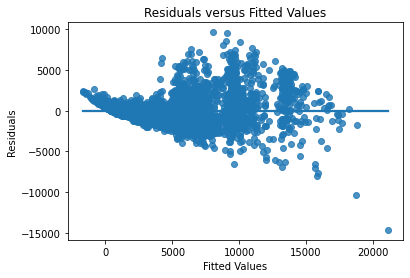

In [ ]:
# residual plot for inital check on the model fit
sns.regplot(x=model.fittedvalues, y=model.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

3. **Normally Distributed Residuals and Mean of 0 Condition':** This condition looks like it is mostly met as the histogram is mostly symmetric, unimodal, and centered at 0.

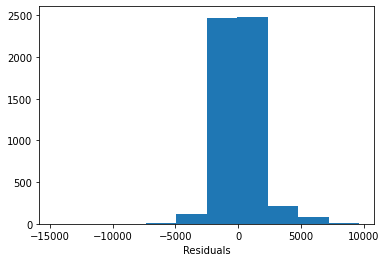

In [ ]:
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.show()

4. **Independence of Residuals Condition**

Because the sample of Diamonds is random and $n<10$% of all Diamonds, we know that this condition is not violated in this particular way.

5. **No Multi-Collinearity Condition**: The three numerical explanatory variables (total_depth_percentage, table, and carat), have no linear relationship. Thus the explanatory variables are non-collinear and so this condition (just for multiple linear regression) is met.

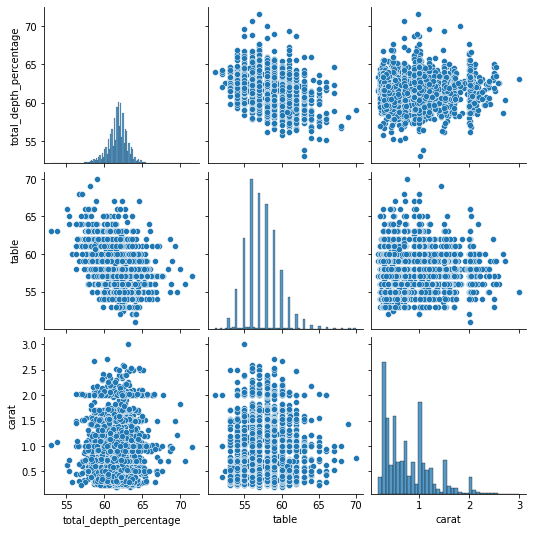

In [ ]:
sns.pairplot(df[['total_depth_percentage', 'table', 'carat']])
plt.show()

In [ ]:
df[['total_depth_percentage', 'table', 'carat']].corr()

,total_depth_percentage,table,carat
total_depth_percentage,1.000000,-0.306745,0.008868
table,-0.306745,1.000000,0.164421
carat,0.008868,0.164421,1.000000


**#2 Constant Variance of Residuals Condition from linear regression condition is not met. Thus, we will use log-transformation.**

In [ ]:
newmodel1 = smf.ols('price ~ total_depth_percentage + np.log(table) + carat + cut', data = df).fit()
newmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     4375.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:04:42   Log-Likelihood:                -47168.
No. Observations:                5400   AIC:                         9.435e+04
Df Residuals:                    5392   BIC:                         9.440e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.323e+04   3532.049      3.746      0.000    6307.484    2.02e+04
cut[T.Good]              889.7784    135.212      6.581      0.000     624.708    1154.849
cut[T.Ideal]            1352.7181    133.188     10.156      0.000    1091.616    1613.820
cut[T.Premium]          1094.4921    128.559      8.514      0.000     842.464    1346.521
cut[T.Very Good]        1138.9625    127.705      8.919      0.000     888.610    1389.315
total_depth_percentage   -87.7309     16.909     -5.189      0.000    -120.878     -54.583
np.log(table)          -2793.6695    723.729     -3.860      0.000   -4212.472   -1374.867
carat                   7828.2538     45.151    173.379      0.000    7739.739    7916.768
==============================================================================
Omnibus:                     1282.532   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12389.487
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                      10.220   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

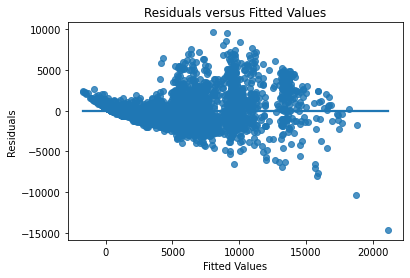

In [ ]:
# residual plot for inital check on the model fit
sns.regplot(x=newmodel1.fittedvalues, y=newmodel1.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

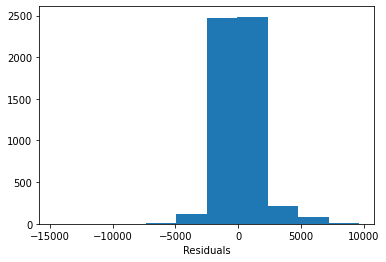

In [ ]:
plt.hist(newmodel1.resid)
plt.xlabel('Residuals')
plt.show()

Since the first transformation model didn't improved a lot from the original model, we will use another transformation model.

In [ ]:
newmodel2 = smf.ols('price ~ total_depth_percentage + np.log(table) + np.log(carat) + cut', data = df).fit()
newmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:04:42   Log-Likelihood:                -48715.
No. Observations:                5400   AIC:                         9.745e+04
Df Residuals:                    5392   BIC:                         9.750e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.578e+04   4716.197      5.466      0.000    1.65e+04     3.5e+04
cut[T.Good]              740.0197    180.064      4.110      0.000     387.022    1093.017
cut[T.Ideal]            1260.2031    177.408      7.103      0.000     912.412    1607.994
cut[T.Premium]          1184.3361    171.284      6.914      0.000     848.551    1520.121
cut[T.Very Good]        1089.6831    170.102      6.406      0.000     756.215    1423.151
total_depth_percentage   -84.7793     22.521     -3.764      0.000    -128.930     -40.628
np.log(table)          -3822.5180    965.537     -3.959      0.000   -5715.360   -1929.676
np.log(carat)           5845.2268     48.387    120.802      0.000    5750.369    5940.084
==============================================================================
Omnibus:                     1367.221   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3539.382
Skew:                           1.365   Prob(JB):                         0.00
Kurtosis:                       5.877   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

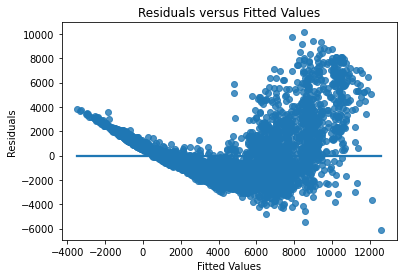

In [ ]:
# residual plot for inital check on the model fit
sns.regplot(x=newmodel2.fittedvalues, y=newmodel2.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

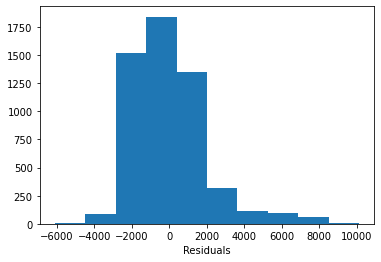

In [ ]:
plt.hist(newmodel2.resid)
plt.xlabel('Residuals')
plt.show()

Since the this transformation model didn't improved a lot from the previous one (R^2 is less than R^2 of the first transformation model), we will use another transformation model.

In [ ]:
newmodel3 = smf.ols('price ~ np.log(total_depth_percentage) + np.log(table) + np.log(carat) + cut', data = df).fit()
newmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:04:43   Log-Likelihood:                -48716.
No. Observations:                5400   AIC:                         9.745e+04
Df Residuals:                    5392   BIC:                         9.750e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       4.129e+04   8184.372      5.045      0.000    2.52e+04    5.73e+04
cut[T.Good]                      751.3466    179.662      4.182      0.000     399.137    1103.556
cut[T.Ideal]                    1278.0439    176.212      7.253      0.000     932.598    1623.490
cut[T.Premium]                  1200.8661    170.259      7.053      0.000     867.089    1534.643
cut[T.Very Good]                1104.9557    169.268      6.528      0.000     773.122    1436.789
np.log(total_depth_percentage) -5072.4029   1379.887     -3.676      0.000   -7777.539   -2367.267
np.log(table)                  -3785.7854    965.420     -3.921      0.000   -5678.399   -1893.171
np.log(carat)                   5844.8717     48.388    120.792      0.000    5750.012    5939.731
==============================================================================
Omnibus:                     1367.524   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3541.064
Skew:                           1.365   Prob(JB):                         0.00
Kurtosis:                       5.878   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

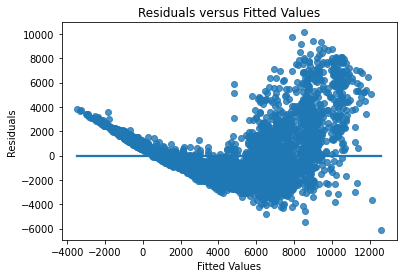

In [ ]:
# residual plot for inital check on the model fit
sns.regplot(x=newmodel3.fittedvalues, y=newmodel3.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

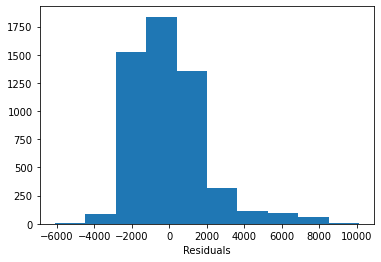

In [ ]:
plt.hist(newmodel3.resid)
plt.xlabel('Residuals')
plt.show()

With testing these transformations, we will find that it seems that there is no way to improve the #2 condition of linear regression model (first transformation model has no big difference, second and third transformation model has lower R^2 than the original model). Then we should analyse the orginal model.

In [ ]:
model.rsquared

0.8502854116235555

We found the R^2 of our model is 0.85. The R^2 helps us here to evaluate the performance of the linear regression model. The R^2 here tells us that 85% of the variability is explained by this model, which is pretty high.

Now, we will predict the price of a Diamonds that is an Ideal, where total_depth_percentage is 60, table is 60, and carat is 1.

In [ ]:
model.predict(exog = dict(cut = 'Ideal', total_depth_percentage = 60, table = 60, carat = 1))

0    5711.947487
dtype: float64

**By answering our research question, we can say there is a linear relationship between price and total depth percentage,table, carat, and cut since the R^2 of our final model is 0.85, which is close to 1.**

**By predicting when diamonds that is an Ideal, where total_depth_percentage is 60, table is 60, and carat is 1, we will have the predicted price value 5711.947487.**

**As for our coefficients, we will find that all of the coefficients are significant since their p-value are quite small (showed as 0.00), so we have sufficient evidence to suggest it is non-zero in the population model. It help us to explore the population.**

**We think that using our linear regression analysis above we were able to answer out linear regression analysis. We were able to thoroughly predict the value of the numeric response variable using other explanaotry variables. However, even our R^2 is high, this linear relation is not perfect since the violation of #2 condition. Thus, we cannot surely imply much about population by this linear model from this sample.**

## 5. Logistic Regression

In this section, we decided to determine whether there is a linear relationship between the log-odds of the success level of price and color, clarity, table, and total depth percentage of the diamonds in our sample. Our response variable in this case is the **price** of the diamond. Our explanatory variables to start include **color**, **clarity**, **table**, and **total depth percentage**. We chose the two categorical variables (color and clarity) because we have yet to analyze them in a model up to this point and we believed these variables might hold strong predictive power in our model. 

**Is there a linear relationship between the log-odds of the success level of price and color, clarity, table, and the total depth percentage of diamonds? 
What explanatory variables should we include in the model to create a Parsimonious Model?**


In [ ]:
df['price'].median()

2397.5

We chose our success level to be based on whether a sampled diamond is greater than than the median ($2398) of the prices in the dataframe. A '1' in the 'y' column signifies that the price is greater than the median and a '0' signifies a price that is lower. This would show us the which diamonds are greater than at least half of the diamonds in our sample and which are not.

In [ ]:
df['y'] = 1 * (df['price'] >= 2398)

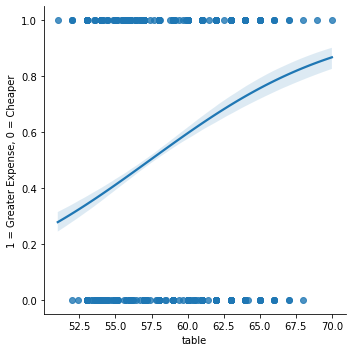

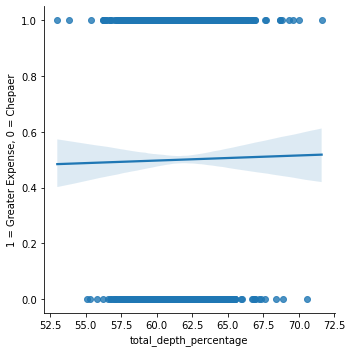

In [ ]:
sns.lmplot(x = "table" , y = "y",data = df, logistic= True)
plt.ylabel("1 = Greater Expense, 0 = Cheaper")
sns.lmplot(x = "total_depth_percentage" , y = "y",data = df, logistic= True)
plt.ylabel("1 = Greater Expense, 0 = Chepaer")
plt.show()

After plotting our logistic curve for the two numerical variables in our model, we can see that the **table** variable seems to have a greater effect on our response variable than the **total_depth_percentage** variable.

We then split our data into training and testing datasets (80% to train and 20% to test) in order to prepare the data for the logistic regression model.

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=123)

In [ ]:
df_train.head()

,carat,cut,color,clarity,total_depth_percentage,table,price,length,width,depth,y
53264,0.70,Premium,G,VS1,62.2,57.0,2648,5.69,5.66,3.53,1
50656,0.31,Good,G,VS2,63.5,58.0,544,4.22,4.29,2.70,0
25544,1.50,Premium,F,VS2,61.3,61.0,14372,7.36,7.33,4.50,1
47907,0.67,Premium,G,SI1,60.5,60.0,1914,5.69,5.65,3.43,0
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66,1


In [ ]:
df_test.head()

,carat,cut,color,clarity,total_depth_percentage,table,price,length,width,depth,y
7824,0.90,Very Good,G,VS2,60.5,60.0,4296,6.20,6.24,3.76,1
36418,0.42,Premium,D,SI1,63.0,59.0,942,4.79,4.77,3.01,0
27996,0.30,Very Good,E,VS2,61.9,61.0,658,4.28,4.32,2.66,0
29829,0.43,Ideal,J,VVS2,61.8,55.0,710,4.89,4.91,3.03,0
29328,0.31,Premium,H,VS1,61.8,61.0,698,4.36,4.32,2.68,0


In [ ]:
currentmod = smf.logit('y~color+clarity+table+total_depth_percentage', data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.631140
         Iterations 5


We then performed a backwards elimination algorithm using the Bayesian Information criterion (BIC) to discover which model is a true model among our set of variables.

In [ ]:
print('Iteration 1: BIC of Current Model', currentmod.bic)

Iteration 1: BIC of Current Model 5586.983136581246


#### **Test Models** 

In [ ]:
testmod = smf.logit('y~color+clarity+table', data=df_train).fit()
print('BIC of test model that deletes "Total Depth Percentage" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.631294
         Iterations 5
BIC of test model that deletes "Total Depth Percentage" variable from the Current Model 5579.945732458961


In [ ]:
testmod = smf.logit('y~color+clarity+total_depth_percentage', data=df_train).fit()
print('BIC of test model that deletes "Table" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.638189
         Iterations 5
BIC of test model that deletes "Table" variable from the Current Model 5639.5185018330585


In [ ]:
testmod = smf.logit('y~color+table+total_depth_percentage', data=df_train).fit()
print('BIC of test model that deletes "Clarity" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.665273
         Iterations 5
BIC of test model that deletes "Clarity" variable from the Current Model 5823.297431236626


In [ ]:
testmod = smf.logit('y~clarity+table+total_depth_percentage', data=df_train).fit()
print('BIC of test model that deletes "Color" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.645993
         Iterations 5
BIC of test model that deletes "Color" variable from the Current Model 5665.08765925596


The test model with the lowest BIC score was the one that deleted **total_depth_percentage**. This test model had a lower BIC score than the current model. Thus, we permanently drop total_depth_percentage from our current model and continue the algorithm.

####**Iteration 2**

In [ ]:
currentmod = smf.logit('y~color+clarity+table', data=df_train).fit()
currentmod.bic

Optimization terminated successfully.
         Current function value: 0.631294
         Iterations 5


5579.945732458961

In [ ]:
testmod = smf.logit('y~color+clarity', data=df_train).fit()
print('BIC of test model that deletes "Table" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.638417
         Iterations 5
BIC of test model that deletes "Table" variable from the Current Model 5633.113813036651


In [ ]:
testmod = smf.logit('y~color+table', data=df_train).fit()
print('BIC of test model that deletes "Clarity" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.666192
         Iterations 5
BIC of test model that deletes "Clarity" variable from the Current Model 5822.866195750031


In [ ]:
testmod = smf.logit('y~clarity+table', data=df_train).fit()
print('BIC of test model that deletes "Color" variable from the Current Model', testmod.bic)

Optimization terminated successfully.
         Current function value: 0.646382
         Iterations 5
BIC of test model that deletes "Color" variable from the Current Model 5660.078728343986


The test model with the lowest BIC score was the one that deleted **table**. This test model did not have a lower BIC score than the current model. Thus, we stop our algorithm and stick with our current model.

We can conclude that our final model is the logistic regression model that predicts the probability that a diamond is expensive (price is greater than 2398 dollars) or more on the cheaper side (price is less than 2398 dollars) with the following explanatory variables:
* clarity
* color
* table 

In [ ]:
finalmod = smf.logit('y~color+clarity+table', data=df_train).fit()
currentmod.summary()

Optimization terminated successfully.
         Current function value: 0.631294
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4320
Model:                          Logit   Df Residuals:                     4305
Method:                           MLE   Df Model:                           14
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.08924
Time:                        15:05:06   Log-Likelihood:                -2727.2
converged:                       True   LL-Null:                       -2994.4
Covariance Type:            nonrobust   LLR p-value:                4.654e-105
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.8912      0.935     -7.366      0.000      -8.725      -5.058
color[T.E]          0.3966      0.119      3.340      0.001       0.164       0.629
color[T.F]          0.6323      0.120      5.251      0.000       0.396       0.868
color[T.G]          0.6714      0.118      5.680      0.000       0.440       0.903
color[T.H]          1.0459      0.125      8.343      0.000       0.800       1.292
color[T.I]          1.1078      0.140      7.885      0.000       0.832       1.383
color[T.J]          1.4053      0.179      7.871      0.000       1.055       1.755
clarity[T.IF]      -1.4663      0.341     -4.300      0.000      -2.135      -0.798
clarity[T.SI1]     -0.2540      0.280     -0.908      0.364      -0.802       0.294
clarity[T.SI2]      0.3517      0.285      1.236      0.217      -0.206       0.909
clarity[T.VS1]     -0.9101      0.284     -3.201      0.001      -1.467      -0.353
clarity[T.VS2]     -0.7583      0.280     -2.704      0.007      -1.308      -0.209
clarity[T.VVS1]    -1.6102      0.305     -5.278      0.000      -2.208      -1.012
clarity[T.VVS2]    -1.1784      0.293     -4.027      0.000      -1.752      -0.605
table               0.1185      0.015      7.750      0.000       0.089       0.148
===================================================================================
"""

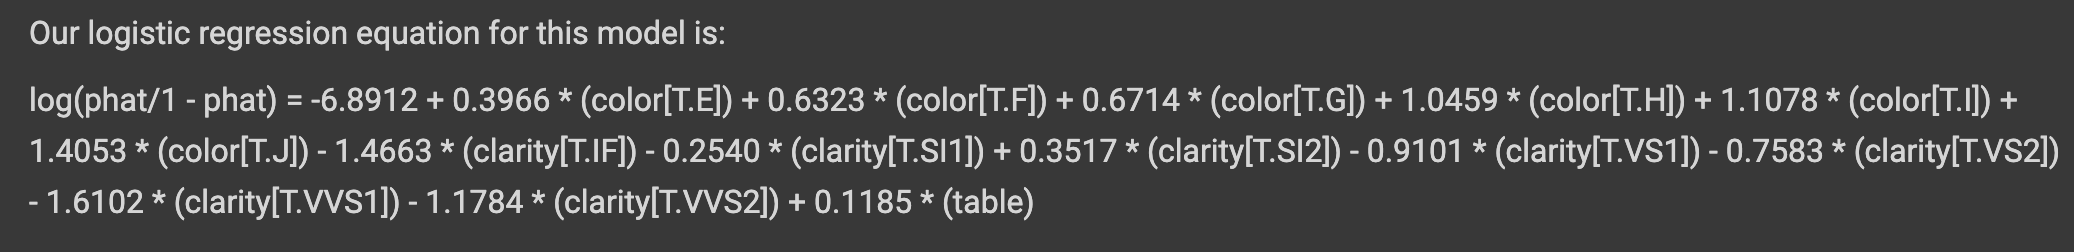

In [ ]:
df_test['phat_test'] = finalmod.predict(exog=df_test)
df_test['phat_test'].head() 

7824     0.532269
36418    0.461013
27996    0.493241
29829    0.462773
29328    0.615495
Name: phat_test, dtype: float64

In [ ]:
fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])
print('auc score:', auc)

auc score: 0.668966628829317


In [ ]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

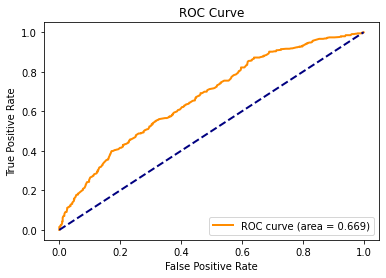

In [ ]:
plot_roc(fpr, tpr, auc)

**The area under our ROC curve is 0.669. From our ROC curve we can use a True Positive Rate of 0.8 and a False Positive Rate of 0.6 in order to choose a threshold.**




In [ ]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [ ]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold       tpr       fpr
0       0.13  0.998145  0.998152
   threshold       tpr       fpr
0       0.14  0.998145  0.994455
   threshold       tpr       fpr
0       0.15  0.996289  0.994455
   threshold       tpr       fpr
0       0.16  0.994434  0.992606
   threshold       tpr       fpr
0       0.17  0.994434  0.985213
   threshold       tpr       fpr
0       0.18  0.994434  0.979667
   thr

**Using a tpr of 0.8 and a fpr of 0.6, we then choose our closest threshold of 0.43.**




In [ ]:
pred_probablities = finalmod.predict(exog = dict(df_test))
df_test["predictive_prob"] = pred_probablities
df_test["yhat"] = 1 * (df_test["predictive_prob"] > 0.43)
df_test

,carat,cut,color,clarity,total_depth_percentage,table,price,length,width,depth,y,phat_test,predictive_prob,yhat
7824,0.90,Very Good,G,VS2,60.5,60.0,4296,6.20,6.24,3.76,1,0.532269,0.532269,1
36418,0.42,Premium,D,SI1,63.0,59.0,942,4.79,4.77,3.01,0,0.461013,0.461013,1
27996,0.30,Very Good,E,VS2,61.9,61.0,658,4.28,4.32,2.66,0,0.493241,0.493241,1
29829,0.43,Ideal,J,VVS2,61.8,55.0,710,4.89,4.91,3.03,0,0.462773,0.462773,1
29328,0.31,Premium,H,VS1,61.8,61.0,698,4.36,4.32,2.68,0,0.615495,0.615495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,0.30,Very Good,H,VVS2,62.0,56.0,559,4.28,4.30,2.66,0,0.403686,0.403686,0
14486,1.00,Very Good,D,SI1,63.2,60.0,5851,6.31,6.35,4.00,1,0.490549,0.490549,1
21741,1.01,Very Good,F,VVS1,61.4,58.0,9810,6.39,6.44,3.94,1,0.269219,0.269219,0
21325,1.51,Premium,F,SI2,59.9,58.0,9471,7.53,7.46,4.49,1,0.723771,0.723771,1


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true = df_test["y"], 
                                  y_pred = df_test["yhat"]).ravel()
(tn, fp, fn, tp)

(261, 280, 148, 391)

In [ ]:
print('True Positivity Rate:', fp/(tn+fn))

True Positivity Rate: 0.684596577017115


In [ ]:
print("False Positivity Rate:", fp/(tn+fp))

False Positivity Rate: 0.5175600739371534


By using this logistic regression model, we have found that there is a linear relationship between the log-odds of the success level of price and color, clarity, table, and total depth percentage of the diamonds in our sample.
The explanatory variable we included in the model in order to create a parsimonious model were color, clarity, and table. 

## 6. Conclusion

For this project, we chose a dataset which contained information about several characteristics of diamonds. First we analysed this data  sample of 5400 diamonds. 

Looking too find any association between price and length, We found that there is a non-linear and moderately strong association between price and length. The correlation coefficient for length and price is 0.886725, which supports that there is a moderately strong relationship between the two variables. From the scatter plot visualization , we saw that as the length increased, the price increased as well. Since our relation is non-linear yet moderately strong, we will proceed with caution in our analysis.     

Then we focused on the relationship between price, length, and clarity of diamonds by using boxplot, scatterplot. We were interested particulary interested in the highest clarity diamond (IF), the middle clarity diamond (VS1) and the lowest clarity diamond (I). Based on our visualizations, we found that there is still an association between length and price for the different types of clarity. We also saw that for diamonds of same price, the  longer diamonds tend to have lower clarity, while the shorter diamonds have higher clarity in our population of diamonds.

We also wanted to know whether there is a price difference between D color (colorless) diamonds and non D color diamonds in average. We did hypothesis test for that, and found we have sufficient evidence to support our alternative hypothesis. We were 95% confident that the difference in prices of D and Non-D coloured diamonds is between -1390.6252 and -880.5923. We ultimately found that the average price of D color diamond is more expensive than average price of non D color diamond.

Next, we built some linear regression models including log-transformation model and choose the best model. After our transformations, we decided to analyze the original model. This model yielded an R^2 of 0.85. This is a relatively high R^2 and proves that 85% of the variability observed in the price variable is explained by the regression model. We made a prediction that when the Cut is Ideal, Total depth percentage is 60, Table is 60, and Carat is 1, the price should be $5711.947.
By using our final linear regression model, we could predict the price of diamonds based on a buyer's wants and budget.

For our final model, we created a logistic regression model and were interested in clarity, table, total depth percentage, and color as our explanatory variables. Our response variable in this case is the price of the diamond. We found that the there is a linear relationship between the log-odds of the success level of price and color, clarity, table, and total depth percentage of the diamonds in our sample of diamonds. We also found that the explanatory variables we included in the model in order to create a parsimonious model were color, clarity, and table. 










**Future Work**

	 	 	 							 					
Developing predictive algorithms that may recommend multiple variants in attributes for the same price, allowing customers to pick the ideal diamond with their desired traits while staying within their budget.

What are the differences in average price of diamonds from best clarity and cut to worst clarity and cut? Specifically it could be an interactive online table that compares variables with prices!
